## Github Repository Process Metrics Extraction and Matching with Product Metrics Dataset

Data Sources: 
- [Bavota et al. (2016)](https://figshare.com/articles/An_Experimental_Investigation_on_the_Innate_Relationship_between_Quality_and_Refactoring/1207916)
- [Apache Ant Mirror Repository](https://github.com/apache/ant)

Paper References: 
- Tanaka D., Choi E., Yoshida N., Fujiwara K., Port D., Iida H. (20xx). An Investigation of the Relationship Between Extract Method and Process Metrics. The Institute of Electronics, Information and Communication Engineers.
- Kumar, L., & Sureka, A. (2017). Application of LSSVM and SMOTE on Seven Open Source Projects for Predicting Refactoring at Class Level. Asia-Pacific Software Engineering Conference (APSEC 2017), 90–99. https://doi.org/10.1109/APSEC.2017.15
- Bavota, G., De Lucia, A., Di Penta, M., Oliveto, R., & Palomba, F. (2015). An experimental investigation on the innate relationship between quality and refactoring. Journal of Systems and Software, 107, 1–14. https://doi.org/10.1016/j.jss.2015.05.024
- Lee, T., Nam, J., Han, D., Kim, S., & In, H. P. (2011). Micro Interaction Metrics for Defect Prediction. Proceedings of the 19th ACM SIGSOFT Symposium and the 13th European Conference on Foundations of Software Engineering, 5589(c), 311–321. https://doi.org/10.1145/2025113.2025156


In [1]:
import os
import pandas as pd
import subprocess

import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 10,5

/home/jerelyn/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Populating the interactive namespace from numpy and matplotlib


In [25]:
# Data directories

data_dir = "data/raw/badsmells/data/"
projects = ["apache-ant", "xerces"]

ddata_dir = "data/transformed/"

In [26]:
# Loading dataset and dropping duplicates
prod_df = pd.DataFrame()
for p in projects:
    p_dir = data_dir + p + "/" + p + "/"
    for f in os.listdir(p_dir):
        if f.endswith("metrics.csv"):
            df = pd.read_csv(p_dir + f, sep=";", index_col=False)
            df["proj"] = p
            prod_df = prod_df.append(df)
prod_df.drop_duplicates(inplace=True)

In [42]:
# Standardization of version names
dversions = []
for ver in prod_df["Version"]:
    dver = ""
    
    for i in ver.split("."):
        if len(i) == 2 and i[0] == "0":
            dver = dver + i[1] + "."
            continue
        dver = dver + i + "."
    dversions.append(dver.rstrip("."))
prod_df["Version"] = dversions
prod_df["Version"] = prod_df["Version"].replace(to_replace="1.8.0final", value="1.8.0")
prod_df["Version"].value_counts()

print("Available versions: {}".format(prod_df["Version"].unique()))
print("nVersions: {}".format(len(prod_df["Version"].unique())))

Available versions: ['1.1' '1.2' '1.3' '1.4' '1.4.1' '1.5' '1.5.1' '1.5.4' '1.6.0' '1.6.1'
 '1.6.2' '1.6.3' '1.6.4' '1.7.0' '1.7.1' '1.8.0' '1.8.1' '1.8.2' '1.0.0'
 '1.0.4' '1.2.0' '1.2.1' '1.2.2' '1.2.3' '1.3.0' '1.3.1' '1.4.0' '1.4.2'
 '1.4.3' '1.4.4' '2.0.0' '2.0.0alpha' '2.0.0beta' '2.0.0beta2' '2.0.0beta3'
 '2.0.0beta4' '2.0.1' '2.0.2' '2.1.0' '2.2.0' '2.2.1' '2.3.0' '2.4.0'
 '2.5.0' '2.6.0' '2.6.1' '2.6.2' '2.7.0' '2.7.1' '2.8.0' '2.8.1' '2.9.0']
nVersions: 52


In [43]:
xer_sel_versions = ['2.0.1', '2.0.2', '2.1.0', '2.2.0', '2.2.1', '2.3.0', '2.4.0', '2.5.0', '2.6.0', '2.6.1', '2.6.2', '2.7.0', '2.7.1']
ant_sel_versions = ['1.5', '1.5.1', '1.5.4', '1.6.0', '1.6.1', '1.6.2', '1.6.3', '1.6.4', '1.7.0', '1.7.1', '1.8.0', '1.8.1', '1.8.2']

### Process Metrics Extraction
Will only consider versions 1.5 onwards for stability. Revision split points
- 1:5
- 2:4
- 3:3
- 4:2
- 5:1

In [49]:
unique([i[:8] for i in prod_df[prod_df["proj"]=="xerces"]["Class"]])

array(['dom.ASBu', 'dom.Coun', 'dom.DOM3', 'dom.DOMA', 'dom.DOMC',
       'dom.DOMF', 'dom.DOMG', 'dom.DOMP', 'dom.DOMW', 'dom.GetE',
       'dom.Pars', 'dom.Writ', 'dom.trav', 'dom.wrap', 'dom3.org',
       'javax.xm', 'jaxp.Dat', 'jaxp.Inl', 'jaxp.Par', 'jaxp.Sou',
       'jaxp.Typ', 'org.apac', 'org.w3c.', 'org.xml.', 'sax.Coun',
       'sax.DTDR', 'sax.Dela', 'sax.Docu', 'sax.SAX2', 'sax.SAXC',
       'sax.SAXW', 'sax.Writ', 'sax.help', 'simplety', 'socket.D',
       'socket.K', 'socket.i', 'ui.DOMPa', 'ui.DOMTr', 'ui.Defau',
       'ui.TreeV', 'util.Arg', 'xni.Coun', 'xni.Docu', 'xni.Obje',
       'xni.PSVI', 'xni.Pass', 'xni.Secu', 'xni.Uppe', 'xni.Writ',
       'xni.XMLG', 'xni.pars', 'xs.Query'],
      dtype='<U8')

In [57]:
prod_df[prod_df["proj"]=="apache-ant"]["Class"].value_counts()

main.org.apache.tools.ant.Project                                                    45
main.org.apache.tools.ant.DirectoryScanner                                           36
main.org.apache.tools.ant.ProjectHelper                                              31
main.org.apache.tools.bzip2.CBZip2OutputStream                                       29
main.org.apache.tools.zip.ZipOutputStream                                            20
main.org.apache.tools.ant.launch.Launcher                                            18
org.apache.tools.ant.taskdefs.AntStructure                                           18
org.apache.tools.ant.taskdefs.Patch                                                  18
org.apache.tools.ant.taskdefs.Untar                                                  18
org.apache.tools.ant.taskdefs.Replace                                                18
org.apache.tools.ant.taskdefs.Java                                                   18
org.apache.tools.ant.taskdefs.Ji

In [73]:
prod_df["proj"].unique()

array(['apache-ant', 'xerces'], dtype=object)

In [91]:
%%time


for proj in ['xerces2-j', 'apache-ant']:
    os.chdir("ghrepos/{}/".format(proj))
    
    proj_df = prod_df[prod_df["proj"] == proj]
    
    if proj == "xerces2-j":
        sel_versions = xer_sel_versions
        ver_prepend = "Xerces-J_"
        start_w = ("dom", "dom3", "javax", "jaxp", "sax", "socket", "simplety", "ui", "util", "xni", "xs")
        
    else:
        sel_versions = ant_sel_versions
        ver_prepend = "rel/"
        starts_w = ("main", "org")
        
    split_points = range(0, len(sel_versions), 2)
    proc_period = []
    ref_period = []
    for i in range(1, 6):
        proc_period.append(sel_versions[:split_points[i]+1])
        ref_period.append(sel_versions[split_points[i]+1:])

    info_cols = ['Refactoring', 'Version', 'Class']
    proc_proj_df = pd.DataFrame()
    for split in range(len(proc_period)):
        print("===== SPLIT {} =====".format(split))
        # Get the start and end of process metrics period versions
        start_proc, end_proc = proc_period[split][0], proc_period[split][-1]
        if proj == "xerces2-j":
            start_proc, end_proc = start_proc.replace(".", "_"), end_proc.replace(".", "_")
        start_comm = subprocess.check_output('git rev-list -n 1 {}{}'.format(ver_prepend, start_proc), shell=True)[:8].decode("utf-8")
        end_comm = subprocess.check_output('git rev-list -n 1 {}{}'.format(ver_prepend, end_proc), shell=True)[:8].decode("utf-8")

        # Get the rows with version inside the ref period
        met_df = proj_df[proj_df["Version"].isin(proc_period[split])][info_cols]
        ref_df = proj_df[proj_df["Version"].isin(ref_period[split])]

        # For NC (Number of changes)
        print("==> Processing NC..")
        output = subprocess.check_output("git diff --name-only {}{} {}{}".format(ver_prepend, start_proc, ver_prepend, end_proc), shell=True)
        
        diff_classes_raw = [i for i in str(output).split("\\n") if i.endswith(".java") and i.lstrip("src/").startswith(ver_prepend)]
        diff_classes = [i.lstrip("src/").rstrip(".java").replace("/",".") for i in diff_classes_raw]
        
        diff_classes = set(diff_classes) & set(met_df["Class"].values)
        met_df["NC"] = met_df["Class"].apply(lambda x: 1 if x in diff_classes else 0)

        # For NDC (Number of Distinct Committers)
        # For AG (Age of revision)
        print("==========================")
        print("==> Processing AG and NDC..")
        ag = []
        ndc = []
        for i in met_df["Class"].values:
            class_str_name = "src/"+i.replace(".","/")+".java"
            rth_commit = subprocess.check_output("git log {} --format=%ct {} | head -n1".format(end_comm, class_str_name), shell=True)
            first_commit = subprocess.check_output("git log --format=%ct {} | tail -1".format(class_str_name), shell=True)
            
            if first_commit == b'' or rth_commit == b'':
                ag.append(None)
            else:
                dt = int(rth_commit) - int(first_commit)
                ag.append(dt)

            authors = subprocess.check_output("git shortlog -s {}{}...{]{} -- {}".format(ver_prepend, start_proc, ver_prepend, end_proc, class_str_name), shell=True)
            if authors == "b''":
                ndc.append(0)
            else:
                n_authors = len([i.strip().split("\t") for i in authors.decode("utf-8").strip("\n").split("\n") if len(i)>0])
                ndc.append(n_authors)
        met_df["AG"] = ag
        met_df["NDC"] = ndc

        # For ADD and DEL
        print("==> Processing ADD&DEL..")
        output = subprocess.check_output("git diff --numstat {} {} | grep -E '*.java'".format(start_comm, end_comm), shell=True)
        add_del_df = pd.DataFrame([entry.split("\\t") for entry in str(output).lstrip("b'").split("\\n")], columns=["ADD", "DEL", "Class"])
        add_del_df.dropna(axis=0, subset=["Class"], inplace=True)

        add_del_df = add_del_df[(add_del_df["Class"].str.startswith(tuple(["src/" + i for i in ver_prepend])))]
        add_del_df["Class"] = add_del_df["Class"].apply(lambda x: x.lstrip("src/").rstrip(".java").replace("/", "."))
        met_df = pd.merge(met_df, add_del_df, how="left", on="Class")

        # For CHURN
        met_df["CHURN"] = met_df["ADD"] + met_df["DEL"]

        met_df["nsplit"] = split+1

        new_df = pd.merge(met_df, ref_df, on=['Class', 'Refactoring'])
        proc_proj_df = proc_proj_df.append(new_df)

    os.chdir("../../")

===== SPLIT 0 =====
==> Processing NC..
==> Processing AG and NDC..
==> Processing ADD&DEL..
===== SPLIT 1 =====


/home/jerelyn/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:1457: RuntimeWarning: divide by zero encountered in long_scalars
  stride //= shape[i]


==> Processing NC..
==> Processing AG and NDC..
==> Processing ADD&DEL..
===== SPLIT 2 =====
==> Processing NC..
==> Processing AG and NDC..
==> Processing ADD&DEL..
===== SPLIT 3 =====
==> Processing NC..
==> Processing AG and NDC..
==> Processing ADD&DEL..
===== SPLIT 4 =====
==> Processing NC..
==> Processing AG and NDC..
==> Processing ADD&DEL..
===== SPLIT 0 =====
==> Processing NC..
==> Processing AG and NDC..


ValueError: unexpected '{' in field name

In [90]:
    os.chdir("../../")

In [9]:
%%time
if not is_dir_changed:
    os.chdir("ghrepos/ant/")
    is_dir_changed = True

info_cols = ['Refactoring', 'Version', 'Class']
proc_prod_df = pd.DataFrame()
for split in range(len(proc_period)):
    print("===== SPLIT {} =====".format(split))
    # Get the start and end of process metrics period versions
    start_proc, end_proc = proc_period[split][0], proc_period[split][-1]
    start_comm = subprocess.check_output('git rev-list -n 1 rel/{}'.format(start_proc), shell=True)[:8].decode("utf-8")
    end_comm = subprocess.check_output('git rev-list -n 1 rel/{}'.format(end_proc), shell=True)[:8].decode("utf-8")
    
    # Get the rows with version inside the ref period
    met_df = prod_df[prod_df["Version"].isin(proc_period[split])][info_cols]
    ref_df = prod_df[prod_df["Version"].isin(ref_period[split])]

    # For NC (Number of changes)
    print("==> Processing NC..")
    output = subprocess.check_output("git diff --name-only rel/{} rel/{}".format(start_proc, end_proc), shell=True)
    diff_classes_raw = [i for i in str(output).split("\\n") if i.endswith(".java") and (i.lstrip("src/").startswith("main") or i.lstrip("src/").startswith("org"))]
    diff_classes = [i.lstrip("src/").rstrip(".java").replace("/",".") for i in diff_classes_raw]
    diff_classes = set(diff_classes) & set(met_df["Class"].values)
    met_df["NC"] = met_df["Class"].apply(lambda x: 1 if x in diff_classes else 0)
    
    # For NDC (Number of Distinct Committers)
    # For AG (Age of revision)
    print("==========================")
    print("==> Processing AG and NDC..")
    ag = []
    ndc = []
    for i in met_df["Class"].values:
        class_str_name = "src/"+i.replace(".","/")+".java"
        rth_commit = subprocess.check_output("git log {} --format=%ct {} | head -n1".format(end_comm, class_str_name), shell=True)
        first_commit = subprocess.check_output("git log --format=%ct {} | tail -1".format(class_str_name), shell=True)
        if first_commit == b'' or rth_commit == b'':
            ag.append(None)
        else:
            dt = int(rth_commit) - int(first_commit)
            ag.append(dt)
        
        authors = subprocess.check_output("git shortlog -s rel/{}...rel/{} -- {}".format(start_proc, end_proc, class_str_name), shell=True)
        if authors == "b''":
            ndc.append(0)
        else:
            n_authors = len([i.strip().split("\t") for i in authors.decode("utf-8").strip("\n").split("\n") if len(i)>0])
            ndc.append(n_authors)
    print(len(ndc))
    met_df["AG"] = ag
    met_df["NDC"] = ndc

    # For ADD and DEL
    print("==> Processing ADD&DEL..")
    output = subprocess.check_output("git diff --numstat {} {} | grep -E '*.java'".format(start_comm, end_comm), shell=True)
    add_del_df = pd.DataFrame([entry.split("\\t") for entry in str(output).lstrip("b'").split("\\n")], columns=["ADD", "DEL", "Class"])
    add_del_df.dropna(axis=0, subset=["Class"], inplace=True)

    add_del_df = add_del_df[(add_del_df["Class"].str.startswith("src/main")) | (add_del_df["Class"].str.startswith("src/org"))]
    add_del_df["Class"] = add_del_df["Class"].apply(lambda x: x.lstrip("src/").rstrip(".java").replace("/", "."))
    met_df = pd.merge(met_df, add_del_df, how="left", on="Class")
    
    # For CHURN
    met_df["CHURN"] = met_df["ADD"] + met_df["DEL"]
    
    met_df["nsplit"] = split+1
    
    new_df = pd.merge(met_df, ref_df, on=['Class', 'Refactoring'])
    print(new_df.shape)
    proc_prod_df = proc_prod_df.append(new_df)


===== SPLIT 0 =====
==> Processing NC..
==> Processing AG and NDC..
1622
==> Processing ADD&DEL..
(13950, 23)
===== SPLIT 1 =====
==> Processing NC..
==> Processing AG and NDC..
2900
==> Processing ADD&DEL..
(20197, 23)
===== SPLIT 2 =====
==> Processing NC..
==> Processing AG and NDC..
4262
==> Processing ADD&DEL..
(21794, 23)
===== SPLIT 3 =====
==> Processing NC..
==> Processing AG and NDC..
5848
==> Processing ADD&DEL..
(19399, 23)
===== SPLIT 4 =====
==> Processing NC..
==> Processing AG and NDC..
7509
==> Processing ADD&DEL..
(12599, 23)
CPU times: user 23.4 s, sys: 3min 6s, total: 3min 29s
Wall time: 38min 24s


In [ ]:
proc_prod_df["Refactoring"].value_counts()

In [57]:
proc_prod_df.drop_duplicates()["Refactoring"].value_counts()

not                                     87734
replace_magic_number_with_constant         40
consolidate_duplicate_cond_fragments       32
extract_method                             27
introduce_explaining_variable              24
remove_assignment_to_parameters            22
inline_temp                                12
remove_parameter                           12
add_parameter                              10
consolidate_cond_expression                 7
replace_nested_cond_guard_clauses           7
rename_method                               6
remove_control_flag                         2
inline_method                               2
move_field                                  2
Name: Refactoring, dtype: int64

In [58]:
proc_prod_df["w_ref"] = proc_prod_df["Refactoring"].apply(lambda x: 1 if x!="not" else 0) 

In [64]:
proc_prod_df.to_csv("../../"+ddata_dir+"proc_prod.csv")

In [65]:
proc_prod_df.columns

Index(['Refactoring', 'Version_x', 'Class', 'NC', 'AG', 'NDC', 'ADD', 'DEL',
       'CHURN', 'nsplit', 'Version_y', 'LOC', 'WMC', 'DIT', 'NOC', 'RFC',
       'CBO', 'LCOM', 'NOM', 'NOA', 'NOO', 'CCBC', 'C3', 'w_ref'],
      dtype='object')

In [66]:
info_cols = ['Version_x',  'Version_y', 'Class', 'nsplit']
label_cols = ['Refactoring', 'w_ref']
proc_cols = ['NC', 'AG', 'NDC', 'ADD', 'DEL', 'CHURN']
prod_cols = ['LOC', 'WMC', 'DIT', 'NOC', 'RFC','CBO', 'LCOM', 'NOM', 'NOA', 'NOO', 'CCBC', 'C3']

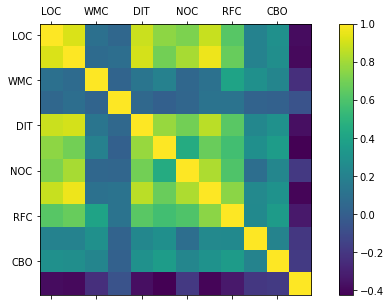

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(proc_prod_df[prod_cols].corr(), interpolation='nearest')
fig.colorbar(cax)

ax.set_xticklabels(['']+prod_cols)
ax.set_yticklabels(['']+prod_cols)

plt.show()